## Notebook 01 - Clase de Regresión Lineal

## Caso puramente lineal

Llamo la librería de álgebra lineal, generación de números aleatorios y gráficos (visualización)

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(0) #reproducibilidad: fijo una semilla de números aleatorios para obtener siempre los mismos resultados

Creo $N$ puntos aleatorios

In [ ]:
N = 50 #número de puntos
x = np.random.rand(N)

In [ ]:
x

array([0.84028162, 0.62376468, 0.79894998, 0.02780432, 0.30735316,
       0.60931275, 0.02798625, 0.57518482, 0.29688486, 0.75694027,
       0.3817603 , 0.81678987, 0.93213731, 0.61659278, 0.46790331,
       0.770524  , 0.8438189 , 0.5090566 , 0.91663354, 0.85793779,
       0.13239825, 0.49548002, 0.87617172, 0.58812518, 0.83482961,
       0.0627196 , 0.17278633, 0.39648795, 0.92267631, 0.1579722 ,
       0.83220851, 0.83923795, 0.51056996, 0.50755905, 0.1291164 ,
       0.86989375, 0.10118536, 0.65401823, 0.86701112, 0.31003687,
       0.63782659, 0.78442262, 0.06230934, 0.51725663, 0.8157713 ,
       0.1431539 , 0.4495219 , 0.43984948, 0.59721127, 0.30427907])

Supongamos que conocemos $\theta_0$ y $\theta_1$

In [ ]:
theta_0 = 1.3
theta_1 = 2.5

Creamos un modelo de referencia donde agregamos ruido a los puntos generados aleatoriamente:

In [ ]:
y = theta_1*x + theta_0 + 0.2*np.random.randn(N)

In [ ]:
help(np.random.randn)

Help on built-in function randn:

randn(...) method of numpy.random.mtrand.RandomState instance
    randn(d0, d1, ..., dn)
    
    Return a sample (or samples) from the "standard normal" distribution.
    
    .. note::
        This is a convenience function for users porting code from Matlab,
        and wraps `standard_normal`. That function takes a
        tuple to specify the size of the output, which is consistent with
        other NumPy functions like `numpy.zeros` and `numpy.ones`.
    
    .. note::
        New code should use the ``standard_normal`` method of a ``default_rng()``
        instance instead; please see the :ref:`random-quick-start`.
    
    If positive int_like arguments are provided, `randn` generates an array
    of shape ``(d0, d1, ..., dn)``, filled
    with random floats sampled from a univariate "normal" (Gaussian)
    distribution of mean 0 and variance 1. A single float randomly sampled
    from the distribution is returned if no argument is provided.
 

Construimos el problema matricial tal y cómo lo vimos en clases.
Para poder resolver este problema, utiliza el comando help sobre la función
```np.linalg.lstsq```

In [ ]:
help(np.linalg.lstsq)

Help on function lstsq in module numpy.linalg:

lstsq(a, b, rcond='warn')
    Return the least-squares solution to a linear matrix equation.
    
    Computes the vector `x` that approximately solves the equation
    ``a @ x = b``. The equation may be under-, well-, or over-determined
    (i.e., the number of linearly independent rows of `a` can be less than,
    equal to, or greater than its number of linearly independent columns).
    If `a` is square and of full rank, then `x` (but for round-off error)
    is the "exact" solution of the equation. Else, `x` minimizes the
    Euclidean 2-norm :math:`||b - ax||`. If there are multiple minimizing
    solutions, the one with the smallest 2-norm :math:`||x||` is returned.
    
    Parameters
    ----------
    a : (M, N) array_like
        "Coefficient" matrix.
    b : {(M,), (M, K)} array_like
        Ordinate or "dependent variable" values. If `b` is two-dimensional,
        the least-squares solution is calculated for each of the `K` c

Por lo tanto necesitamos la primera salida, que corresponde a la solución del problema

Primero construye la matriz $X$

In [ ]:
X = np.column_stack((x,np.ones((N,1))))

Luego, resuelve le problema para $\mathbf{y}$ y $X$ utilizando ```np.linalg.lstsq```

In [ ]:
theta_hat = np.linalg.lstsq(X,y,rcond=None)[0] #resuelve la ecuación normal

In [ ]:
theta_hat

array([2.5197617 , 1.26460386])

Interpola utilizando los $\hat{\theta_0}$ y $\hat{\theta_1}$ que son las soluciones aproximadas via regresión lineal. Compara ambos gráficos.

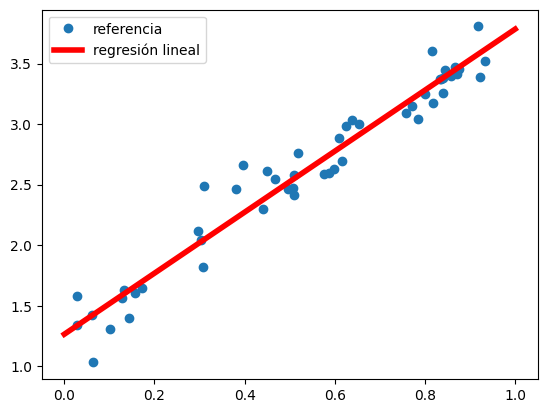

In [ ]:
t = np.linspace(0,1,200)
yhat = theta_hat[0]*t + theta_hat[1]

plt.plot(x,y,'o')
plt.plot(t,yhat,'r',linewidth=4)
plt.legend(['referencia','regresión lineal'])

## Caso Cuadrático

Intenta resolver a través del mismo procedimiento anterior el caso cuadrático

In [ ]:
theta_0 = 1.2
theta_1 = 1.3
theta_2 = -2.5

y = theta_2*x**2 + theta_1*x + theta_0 + 0.2*np.random.randn(N)

Creación de $X$

In [ ]:
X = np.column_stack((x**2,x,np.ones((N,1))))

Solucionando el problema

In [ ]:
theta_hat = np.linalg.lstsq(X,y,rcond=None)[0]

Graficando los resultados

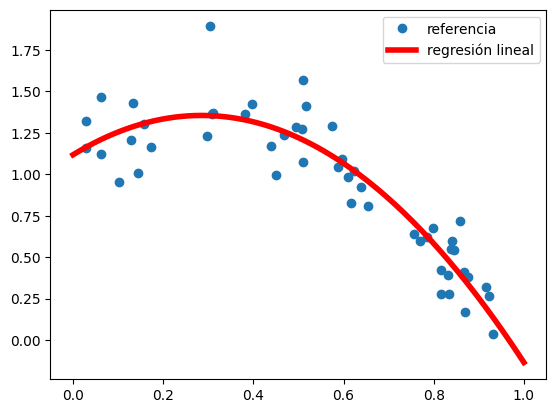

In [ ]:
t = np.linspace(0,1,200)
yhat = theta_hat[0]*t**2 + theta_hat[1]*t + theta_hat[2]

plt.plot(x,y,'o')
plt.plot(t,yhat,'r',linewidth=4)
plt.legend(['referencia','regresión lineal'])